In [40]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Load data
header_names = columns = [
    "buying",
    "maintaince",
    "doors",
    "persons",
    "luggage_boot",
    "safety",
    "class"
]
dataset = pd.read_csv("../../../../datasets/car.data", header=None, names=header_names)
dataset.head()

,buying,maintaince,doors,persons,luggage_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [42]:
# Check dataset size
dataset.shape

(1729, 7)

In [43]:
# Check dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1729 non-null   object
 1   maintaince    1729 non-null   object
 2   doors         1729 non-null   object
 3   persons       1729 non-null   object
 4   luggage_boot  1729 non-null   object
 5   safety        1729 non-null   object
 6   class         1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [44]:
# Check statistics
dataset.describe()

,buying,maintaince,doors,persons,luggage_boot,safety,class
count,1729,1729,1729,1729,1729,1729,1729
unique,4,4,4,3,3,3,4
top,low,low,5more,more,big,high,unacc
freq,433,433,433,577,577,577,1210


In [45]:
# Check duplicates
dataset.duplicated().sum()

np.int64(1)

In [46]:
# Remove duplicates
dataset.drop_duplicates(inplace=True)

In [47]:
# Check shape
dataset.shape

(1728, 7)

In [48]:
dataset.buying.value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

25.0
25.0
25.0
25.0


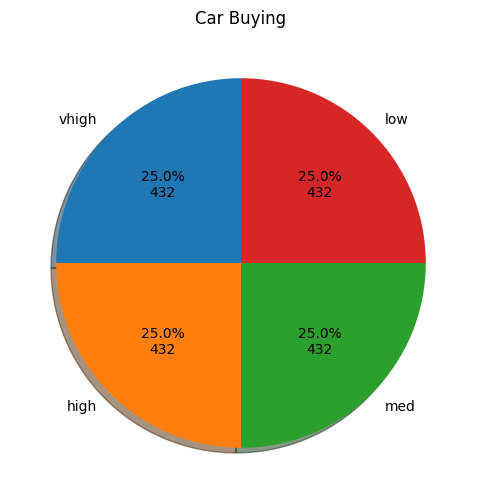

In [49]:
# Check buying
buying_data = dataset.buying.value_counts()
buy_labels = buying_data.index
buy_values = buying_data.values

def autopct_format(values):
    def my_format(pct):
        print(pct)
        total = sum(values)
        count = int(round(pct * total / 100))
        return f"{pct:.1f}%\n{count}"
    return my_format

plt.figure(figsize=(6, 6))
plt.pie(
    buy_values,
    labels=buy_labels,
    autopct=autopct_format(buy_values),
    startangle=90,
    shadow=True
)

plt.title("Car Buying")
plt.show()

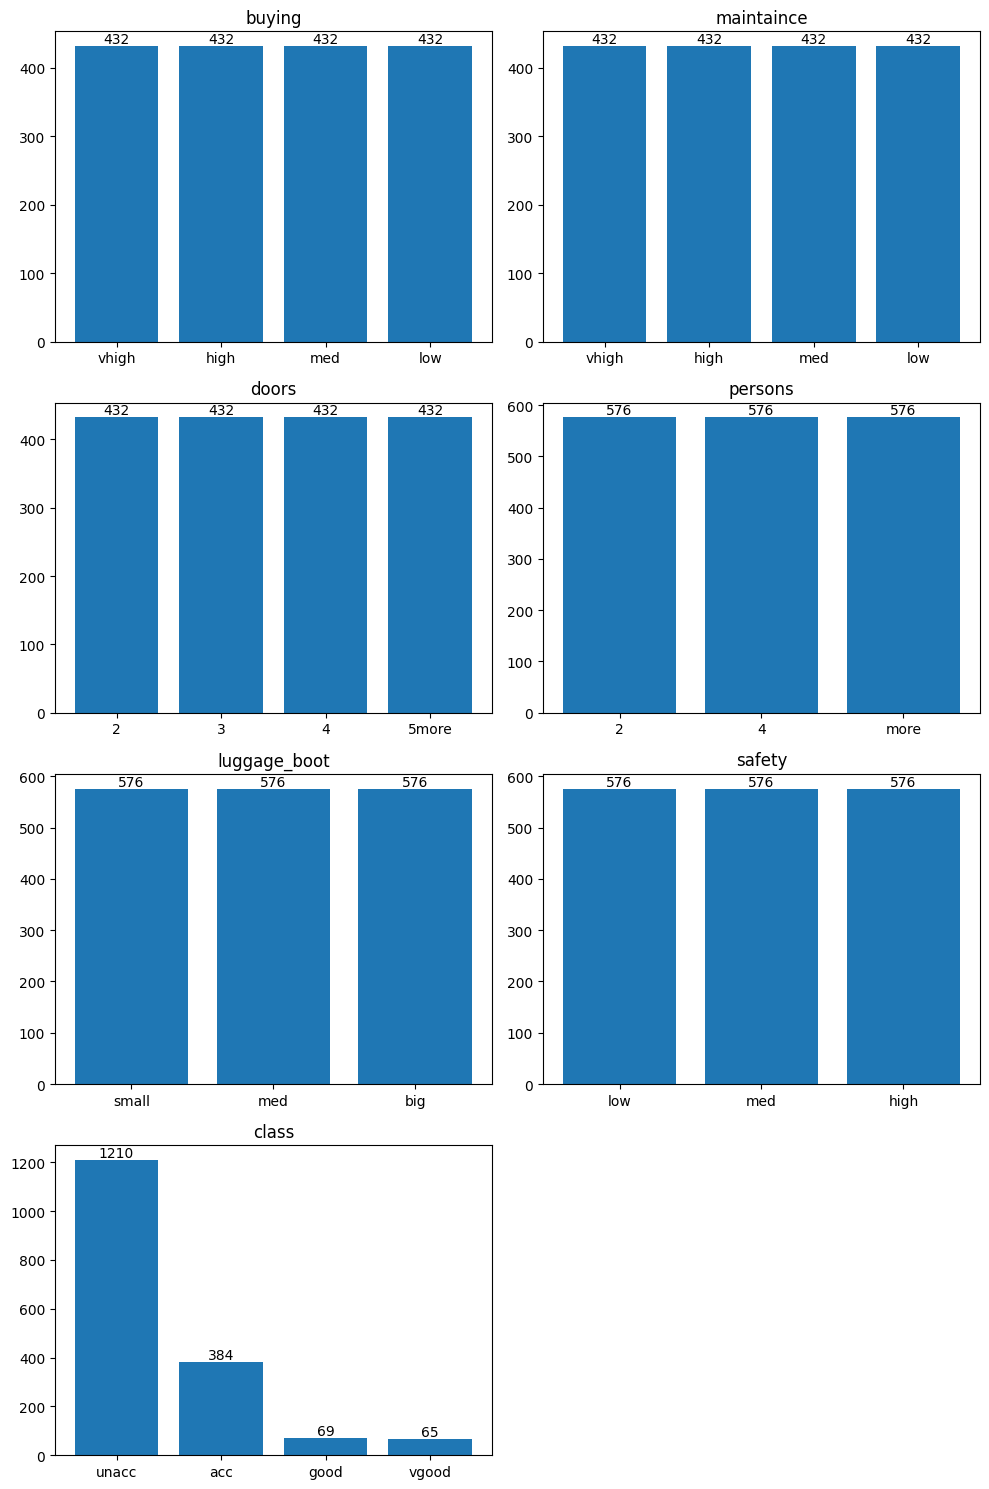

In [50]:
plt.figure(figsize=(10, 15))
for i, column in enumerate(dataset.columns, 1):
    plt.subplot(4, 2, i)
    data = dataset[column].value_counts()
    
    bar_graphs = plt.bar(data.index, data.values)
    for bar_graph in bar_graphs:
        plt.text(
            bar_graph.get_x() + bar_graph.get_width() / 2,
            bar_graph.get_height(),
            bar_graph.get_height(),
            ha='center',
            va='bottom'
        )
        
    plt.title(column)
    
plt.tight_layout()
plt.show()

In [67]:
# Devide X and y
X = dataset.drop('class', axis=1)
y = dataset['class']

In [68]:
X = pd.get_dummies(X, drop_first=True)
X

,buying_low,buying_med,buying_vhigh,maintaince_low,maintaince_med,maintaince_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,luggage_boot_med,luggage_boot_small,safety_low,safety_med
0,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False
1,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True
1724,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False
1725,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False
1726,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True


In [69]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [70]:
# Scale X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Create model
model = LogisticRegression()

In [73]:
# Train model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [74]:
# Predict model
y_pred = model.predict(X_test)

In [75]:
# Check accuracy score
accuracy_score(y_test, y_pred)

0.9190751445086706

In [76]:
# Check confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 94,   3,  14,   4],
       [  8,  12,   0,   1],
       [ 12,   0, 351,   0],
       [  0,   0,   0,  20]])

In [77]:
# Check classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.82      0.82      0.82       115
        good       0.80      0.57      0.67        21
       unacc       0.96      0.97      0.96       363
       vgood       0.80      1.00      0.89        20

    accuracy                           0.92       519
   macro avg       0.85      0.84      0.84       519
weighted avg       0.92      0.92      0.92       519

